In [1]:
%load_ext autoreload
%autoreload 2

# load environment variables
import os
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from src.functions.io import ModuleFileReader
from src import queries
scripts = ModuleFileReader(queries)

In [2]:
engine = create_engine(os.environ.get("DATABASE_URL"))

## director --> success criteria, based on genre, companies,

In [3]:
person_metrics = pd.read_sql_query(scripts.read("persons_metrics.sql"), engine)

## num of people in each role per movie

Do horror movies have less actors?

- The numbers here just represent key personnel that were listed on Wikipedia, etc. Movies take 100s of people to make


In [4]:
persons_per_role = pd.read_sql_query(scripts.read("persons_per_role.sql"), engine)

In [5]:
persons_per_role.sort_values("total_persons", ascending=False)

,id,title,total_persons,num_actors,num_directors,num_producers,num_writers,num_editors,num_screenwriters,num_story,num_composers,num_narrators
691,1481,Movie 43,88,27,15,4,20,14,0,0,6,2
897,467,The Lego Ninjago Movie,37,9,3,6,0,5,6,7,1,0
1060,62,Isle of Dogs,30,16,1,4,0,2,1,4,1,1
975,1363,The Expendables 3,30,17,1,5,0,2,3,1,1,0
11,758,Rules Don't Apply,29,5,1,16,0,4,1,2,0,0
2062,1892,Gnomeo & Juliet,29,9,1,3,0,1,7,6,2,0
1003,678,Sausage Party,29,13,2,4,0,1,4,3,2,0
2124,1103,Polis EVO,28,20,1,1,0,1,4,0,1,0
1271,2121,Valentine's Day,28,19,1,2,0,1,1,3,1,0
587,1628,V/H/S/2,28,1,7,5,5,6,0,0,4,0


<BarContainer object of 10 artists>

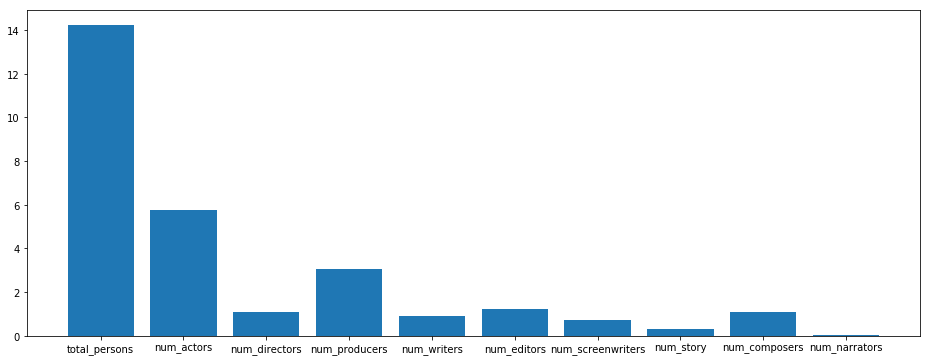

In [6]:
plt.figure(figsize=(16,6))
plt.bar(persons_per_role.mean()[1:].index, persons_per_role.mean()[1:].values) 

## genre persons per role

In [7]:
genre_ppr = pd.read_sql_query(scripts.read("genre_persons_per_role.sql"), engine)

In [8]:
genre_ppr.groupby('genre').mean()

,id,total_persons,num_actors,num_directors,num_producers,num_writers,num_editors,num_screenwriters,num_story,num_composers,num_narrators,film_id,genre_id,id
genre,,,,,,,,,,,,,,
Action,1086.402344,15.863281,6.582031,1.050781,3.267578,0.810547,1.373047,1.009766,0.552734,1.191406,0.025391,1086.402344,5.0,5.0
Adventure,1091.191710,16.800518,7.362694,1.111399,2.873057,0.727979,1.360104,1.290155,0.880829,1.124352,0.069948,1091.191710,6.0,6.0
Animation,1103.886364,16.840909,7.484848,1.265152,2.363636,0.568182,1.136364,1.500000,1.272727,1.143939,0.106061,1103.886364,10.0,10.0
Biography,1069.067873,13.832579,5.230769,1.045249,3.502262,0.705882,1.199095,0.782805,0.217195,1.117647,0.031674,1069.067873,17.0,17.0
Comedy,1205.604027,15.067114,6.377181,1.126174,2.961074,0.995973,1.202685,0.751678,0.489933,1.107383,0.055034,1205.604027,9.0,9.0
Crime,1148.862464,14.510029,5.802292,1.040115,3.340974,0.816619,1.289398,0.713467,0.303725,1.186246,0.017192,1148.862464,7.0,7.0
Documentary,1507.613861,9.524752,2.237624,1.277228,2.693069,0.712871,1.435644,0.069307,0.000000,0.841584,0.257426,1507.613861,19.0,19.0
Drama,1160.706169,13.575487,5.387987,1.037338,3.187500,0.851461,1.163149,0.649351,0.206981,1.068994,0.022727,1160.706169,4.0,4.0
Family,1191.682927,15.951220,6.956098,1.160976,2.526829,0.629268,1.141463,1.360976,1.000000,1.078049,0.097561,1191.682927,11.0,11.0


## why horror films are cheaper? - No name actors?

In [9]:
person_metrics = pd.read_sql_query(scripts.read("persons_metrics.sql"), engine)
person_metrics

,id,full_name,most_common_role,most_common_company,film_count,avg_gross,avg_budget,avg_roi,avg_meta_rating,avg_imdb_rating,avg_tomatoes_rating
0,1,Lin Shaye,Actor,Blumhouse Productions,5,1.063222e+08,7.250000e+06,14.057457,46.812500,5.687500,38.375000
1,2,Angus Sampson,Actor,Blumhouse Productions,3,1.365224e+08,1.057143e+07,12.065226,53.444444,5.944444,55.333333
2,3,Leigh Whannell,Writer,Blumhouse Productions,4,9.600635e+07,8.000000e+06,10.533980,55.461538,6.597436,60.769231
3,4,Spencer Locke,Actor,Blumhouse Productions,1,1.678856e+08,1.000000e+07,15.788559,49.000000,5.700000,32.000000
4,5,Caitlin Gerard,Actor,Blumhouse Productions,2,1.678856e+08,1.000000e+07,15.788559,49.000000,5.642857,32.000000
5,6,Bruce Davison,Actor,Blumhouse Productions,3,5.143568e+07,4.687500e+06,5.920710,45.400000,4.980000,32.100000
6,7,Adam Robitel,Director,Blumhouse Productions,2,1.322926e+08,1.000000e+07,12.229260,41.400000,5.260000,25.200000
7,8,Timothy Alverson,Editor,Blumhouse Productions,5,7.758987e+07,1.116667e+07,5.862358,39.208333,5.458333,26.125000
8,9,Jason Blum,Producer,Blumhouse Productions,37,7.963973e+07,7.932143e+06,27.739484,52.238710,5.896129,49.678571
9,10,Oren Peli,Producer,Blumhouse Productions,9,8.358828e+07,4.397059e+06,24.320537,49.454545,5.364706,35.382353


In [10]:
persons_n_roles = pd.read_sql_query(scripts.read("persons_n_roles.sql"), engine)
persons_n_roles

,id,full_name,total_roles,distinct_films,acting_roles,directing_roles,producing_roles,writing_roles,editing_roles,screenwriting_roles,story_roles,composing_roles,narrating_roles
0,1,Lin Shaye,5,5,5,0,0,0,0,0,0,0,0
1,2,Angus Sampson,3,3,3,0,0,0,0,0,0,0,0
2,3,Leigh Whannell,10,4,2,2,1,3,0,1,1,0,0
3,4,Spencer Locke,1,1,1,0,0,0,0,0,0,0,0
4,5,Caitlin Gerard,2,2,2,0,0,0,0,0,0,0,0
5,6,Bruce Davison,3,3,3,0,0,0,0,0,0,0,0
6,7,Adam Robitel,2,2,0,1,0,0,0,1,0,0,0
7,8,Timothy Alverson,5,5,0,0,0,0,5,0,0,0,0
8,9,Jason Blum,37,37,0,0,37,0,0,0,0,0,0
9,10,Oren Peli,11,9,0,0,9,0,0,1,1,0,0


In [11]:
persons_n_roles[persons_n_roles.acting_roles > 0].acting_roles.mean()

2.280391813888403

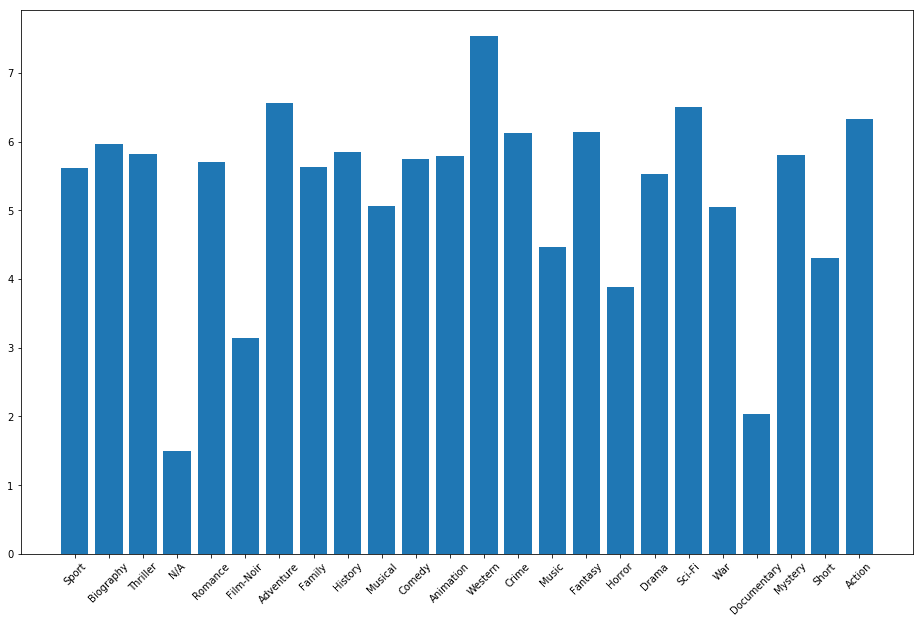

In [12]:
genre_actors_n_roles = pd.read_sql_query(scripts.read("genre_actors_n_roles.sql"), engine)
plt.figure(figsize=(16,10))

plt.bar(genre_actors_n_roles.genre, genre_actors_n_roles.actor_avg_roles)
plt.xticks(rotation=45)
plt.show()

In [13]:
genre_actors_n_roles

,genre,actor_avg_roles,stddev
0,Sport,5.620253,4.854855
1,Biography,5.965398,4.759553
2,Thriller,5.815285,4.826993
3,N/A,1.500000,1.000000
4,Romance,5.704450,4.589856
5,Film-Noir,3.142857,2.478479
6,Adventure,6.558761,4.901016
7,Family,5.629032,4.684934
8,History,5.846422,4.780220
9,Musical,5.058824,4.771122


- Horror films actors were in an average of 3.88 films between 2010-2018
- Also has a lower standard deviation
- **Horror actors are in less films overall. This suggests that they're not bigger names, which makes sense considering horror budgets aren't as high.**

In [22]:
actors_by_film_count = person_metrics[person_metrics.most_common_role == 'Actor'].\
                       sort_values(by='film_count', ascending=False)

## Actors in most films

<BarContainer object of 30 artists>

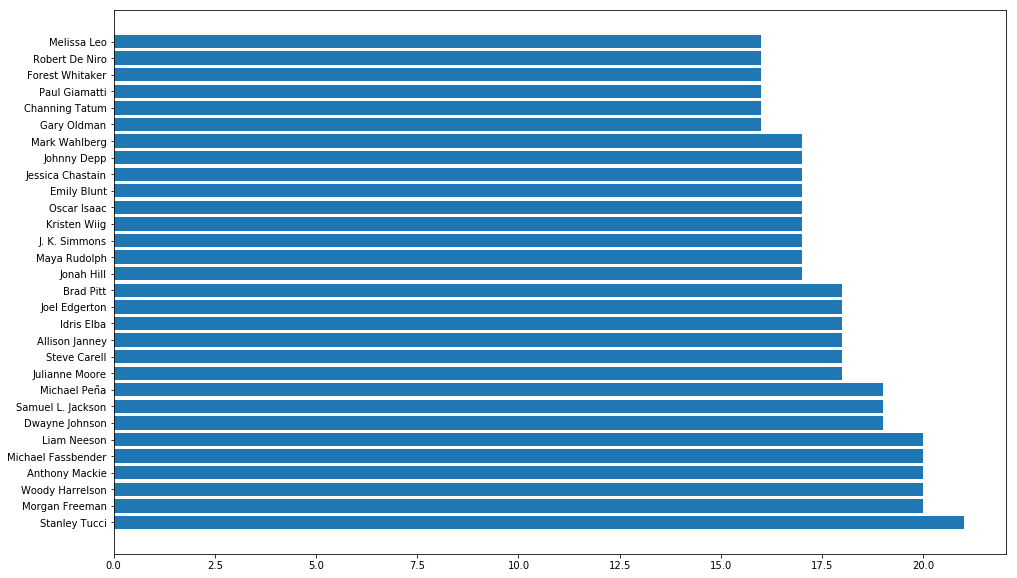

In [23]:
plt.figure(figsize=(16,10))
plt.barh(actors_by_film_count[:30].full_name, actors_by_film_count[:30].film_count)

## Director number of fillms

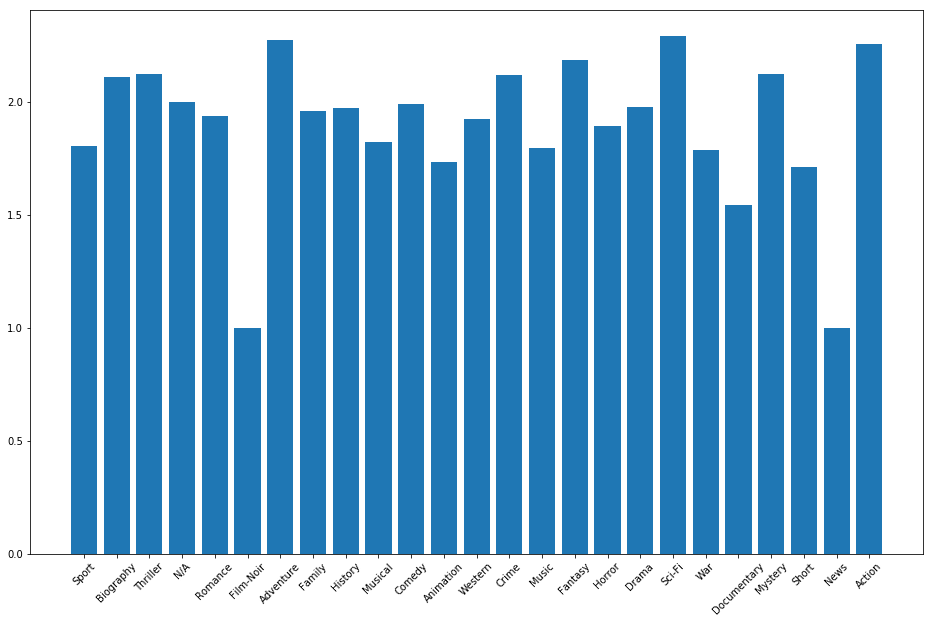

In [16]:
genre_directors_n_roles = pd.read_sql_query(scripts.read("genre_directors_n_roles.sql"), engine)
plt.figure(figsize=(16,10))

plt.bar(genre_directors_n_roles.genre, genre_directors_n_roles.director_avg_roles)
plt.xticks(rotation=45)
plt.show()

In [17]:
genre_directors_n_roles

,genre,director_avg_roles,stddev
0,Sport,1.805970,1.170843
1,Biography,2.112554,1.359465
2,Thriller,2.123476,1.322153
3,N/A,2.000000,NaN
4,Romance,1.937662,1.325338
5,Film-Noir,1.000000,NaN
6,Adventure,2.275058,1.339151
7,Family,1.957983,1.182823
8,History,1.973214,1.491476
9,Musical,1.821429,1.222622


- On average directors had directed two films b/w 2010-2018, with a stddev of about 1. So 1-3 films in 8 years is an expected frequency.

<BarContainer object of 30 artists>

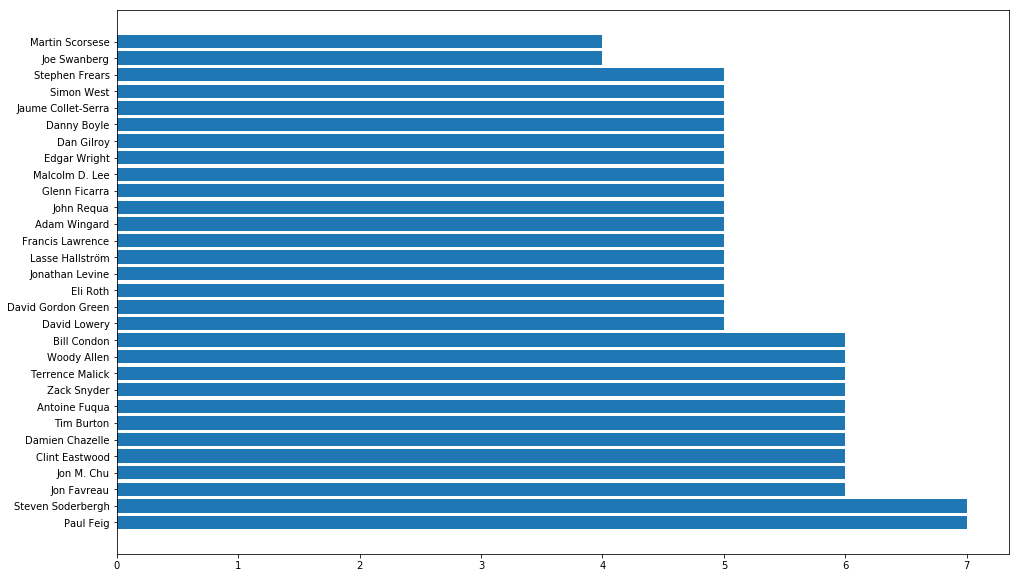

In [24]:
directors_by_film_count = person_metrics[person_metrics.most_common_role == 'Director'].\
                          sort_values(by='film_count', ascending=False)

plt.figure(figsize=(16,10))
plt.barh(directors_by_film_count[:30].full_name, directors_by_film_count[:30].film_count)

<BarContainer object of 30 artists>

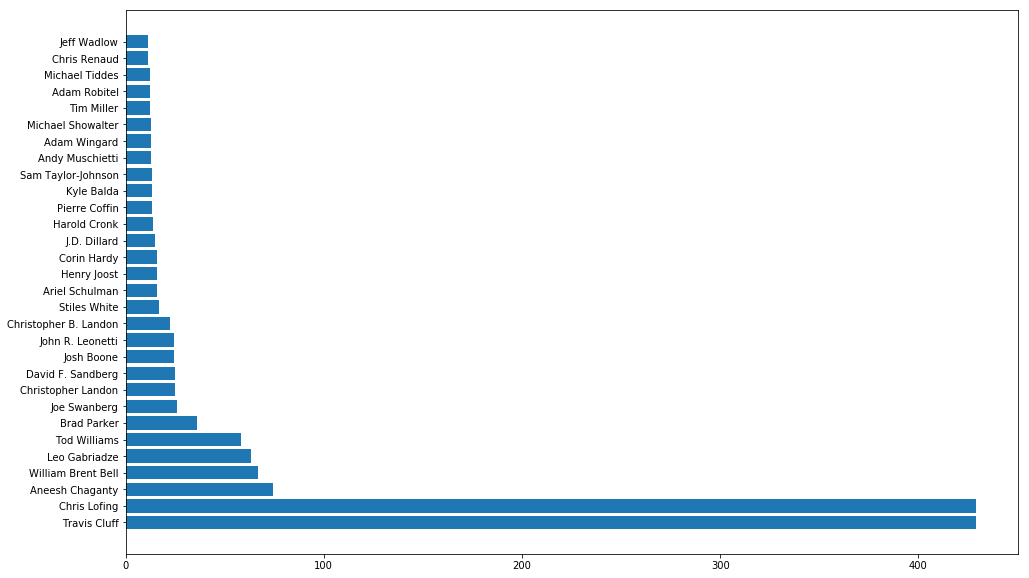

In [28]:
directors_by_roi = person_metrics[person_metrics.most_common_role == 'Director'].\
                   sort_values(by='avg_roi', ascending=False)

plt.figure(figsize=(16,10))
plt.barh(directors_by_roi[:30].full_name, directors_by_roi[:30].avg_roi)

<BarContainer object of 30 artists>

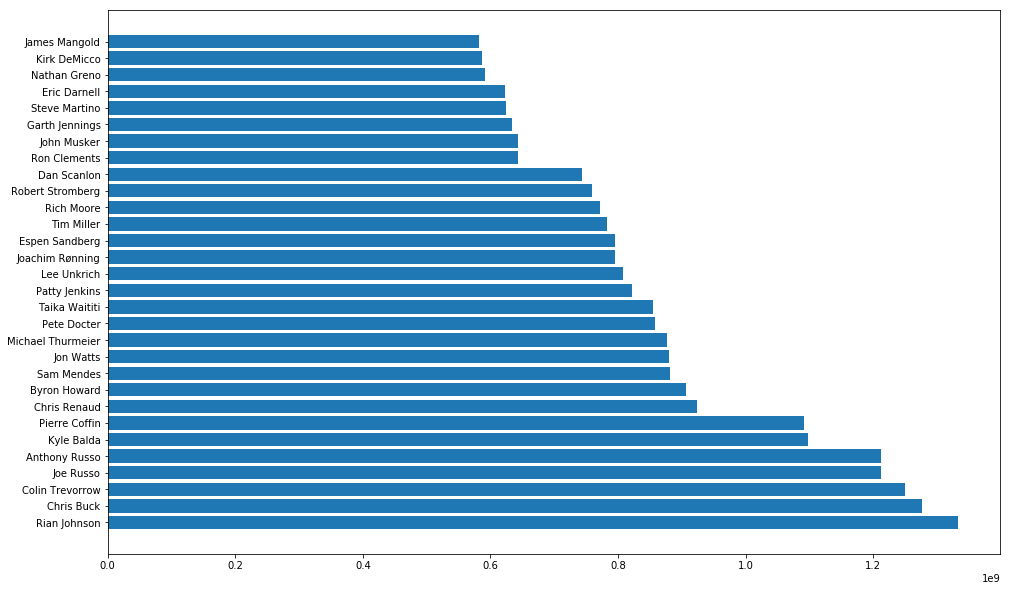

In [41]:
directors_by_gross = person_metrics[person_metrics.most_common_role == 'Director'].\
                   sort_values(by='avg_gross', ascending=False)

plt.figure(figsize=(16,10))
plt.barh(directors_by_gross[:30].full_name, directors_by_gross[:30].avg_gross)

In [29]:
directors_by_roi

,id,full_name,most_common_role,most_common_company,film_count,avg_gross,avg_budget,avg_roi,avg_meta_rating,avg_imdb_rating,avg_tomatoes_rating
7576,8065,Travis Cluff,Director,Blumhouse Productions,1,4.300000e+07,1.000000e+05,429.000000,30.000000,4.200000,15.000000
7575,8064,Chris Lofing,Director,Blumhouse Productions,1,4.300000e+07,1.000000e+05,429.000000,30.000000,4.200000,15.000000
1966,2020,Aneesh Chaganty,Director,Bazelevs Company,1,7.540000e+07,1.000000e+06,74.400000,71.000000,7.700000,92.000000
5049,5233,William Brent Bell,Director,Insurge Pictures,2,8.837143e+07,4.214286e+06,66.735714,26.571429,4.842857,14.571429
9155,10075,Leo Gabriadze,Director,Bazelevs Company,1,6.410000e+07,1.000000e+06,63.099999,59.000000,5.600000,63.000000
13129,14689,Tod Williams,Director,Blumhouse Productions,1,1.775000e+08,3.000000e+06,58.166667,53.000000,5.700000,59.000000
11125,12271,Brad Parker,Director,,1,3.720000e+07,1.000000e+06,36.200000,NaN,5.000000,17.000000
6841,7187,Joe Swanberg,Director,Burn Later Productions,4,2.700000e+07,1.000000e+06,26.000000,61.684211,5.552632,66.894737
4605,4767,Christopher Landon,Director,Blumhouse Productions,1,1.254793e+08,4.800000e+06,25.141514,57.000000,6.500000,71.000000
4227,4346,David F. Sandberg,Director,Atomic Monster Productions,2,2.189515e+08,9.388889e+06,24.964038,59.777778,6.388889,73.888889


In [39]:
dir_genre_roi = pd.read_sql_query(scripts.read("director_genres_by_roi.sql"), engine)
dir_genre_roi.head(25)

,id,full_name,avg_roi,film_count,most_common_genre
0,8065,Travis Cluff,429.000000,1,Horror
1,8064,Chris Lofing,429.000000,1,Horror
2,2020,Aneesh Chaganty,74.400000,1,Drama
3,10075,Leo Gabriadze,63.099999,1,Horror
4,14689,Tod Williams,58.166667,1,Horror
5,1921,Jordan Peele,55.757258,1,Horror
6,12271,Brad Parker,36.200000,1,Horror
7,5233,William Brent Bell,29.265000,2,Horror
8,4767,Christopher Landon,25.141514,1,Horror
9,9833,Josh Boone,24.600000,2,Drama


- Most of the highest ROIs for directors are those who had one-off horror hits

In [57]:
dir_genre_avg_gross = pd.read_sql_query(scripts.read("director_genres_by_avg_gross.sql"), engine)
dir_genre_avg_gross.head(25)

,id,full_name,num_times_directing,avg_gross,most_common_genre
0,5085,Rian Johnson,1,1.332540e+09,Action
1,1080,Joe Russo,3,1.319141e+09,Action
2,1079,Anthony Russo,3,1.319141e+09,Action
3,11952,Chris Buck,1,1.276480e+09,Adventure
4,567,Jennifer Lee,1,1.276480e+09,Adventure
5,4078,Kyle Balda,2,1.086716e+09,Action
6,4077,Pierre Coffin,3,1.048064e+09,Adventure
7,253,J. J. Abrams,3,1.045539e+09,Sci-Fi
8,5851,Andrew Stanton,2,1.028571e+09,Adventure
9,2787,Peter Jackson,3,9.845929e+08,Adventure


In [55]:
dir_genre_cum_gross = pd.read_sql_query(scripts.read("director_genres_by_cum_gross.sql"), engine)
dir_genre_cum_gross.head(25)

,id,full_name,num_times_directing,cumulative_total_gross,most_common_genre
0,4077,Pierre Coffin,3,18865159158,Adventure
1,1079,Anthony Russo,3,14510552501,Action
2,1080,Joe Russo,3,14510552501,Action
3,4078,Kyle Balda,2,13040587848,Action
4,3318,Bill Condon,5,12569805630,Drama
5,11,James Wan,5,11115263079,Thriller
6,906,Michael Bay,6,11059919924,Action
7,1454,Brad Bird,3,10795923324,Action
8,253,J. J. Abrams,3,10455394496,Sci-Fi
9,5387,Byron Howard,2,10285305170,Adventure


- Action/Adventure directors have highest total gross
- The Russo bros have a great avg. gross across 3 avengers films

In [18]:
person_metrics[person_metrics.full_name == 'Christopher Nolan']

,id,full_name,most_common_role,most_common_company,film_count,avg_gross,avg_budget,avg_roi,avg_meta_rating,avg_imdb_rating,avg_tomatoes_rating
4088,4194,Christopher Nolan,Producer,Warner Bros. Pictures,4,7.729252e+08,1.920732e+08,3.123383,74.390244,8.146341,76.195122


In [40]:
person_metrics[person_metrics.full_name == 'John R. Leonetti']

,id,full_name,most_common_role,most_common_company,film_count,avg_gross,avg_budget,avg_roi,avg_meta_rating,avg_imdb_rating,avg_tomatoes_rating
2683,2756,John R. Leonetti,Director,Constantin Film,3,1.694673e+08,8562500.0,24.450496,35.125,6.191667,47.25
